In [197]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ✅ Load and clean data
df = pd.read_csv('../../data/downloads/ftl/ftl_model_output_20250603_001012.csv')
df = df.drop_duplicates(subset='invoice_id', keep='first')
df = df[df['site'].isin(['SPCP'])]
# df = df[df['invoice_commodity_group'].isin(['1CBL'])]
df = df[df['model'].isin([True])]
df = df[(df['freight_per_invoice']>0) & (df['invoice_commodity_quantity']>0)]


In [198]:
df['model'].unique()

array([1.])

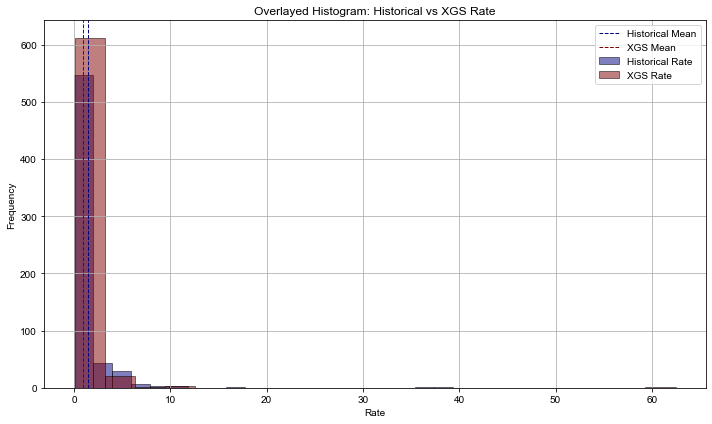

In [199]:
import matplotlib.pyplot as plt
import pandas as pd

# Drop NaNs from both columns
clean_df = df[['xgs_rate', 'historical_rate']].dropna()

# Plot
plt.figure(figsize=(10, 6))
plt.hist(clean_df['historical_rate'], bins=20, alpha=0.5, label='Historical Rate', color='navy', edgecolor='black')
plt.hist(clean_df['xgs_rate'], bins=20, alpha=0.5, label='XGS Rate', color='maroon', edgecolor='black')

# Add mean lines
plt.axvline(clean_df['historical_rate'].mean(), color='navy', linestyle='--', linewidth=1, label='Historical Mean')
plt.axvline(clean_df['xgs_rate'].mean(), color='maroon', linestyle='--', linewidth=1, label='XGS Mean')

# Labels and legend
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.title("Overlayed Histogram: Historical vs XGS Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


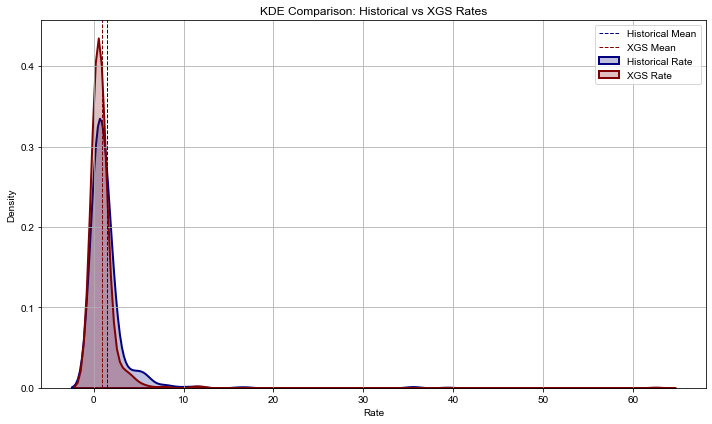

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Drop missing values
clean_df = df[['xgs_rate', 'historical_rate']].dropna()

# Set plot size
plt.figure(figsize=(10, 6))

# KDE for historical_rate
sns.kdeplot(
    data=clean_df, 
    x='historical_rate', 
    fill=True, 
    color='navy', 
    label='Historical Rate', 
    linewidth=2
)

# KDE for xgs_rate
sns.kdeplot(
    data=clean_df, 
    x='xgs_rate', 
    fill=True, 
    color='maroon', 
    label='XGS Rate', 
    linewidth=2
)

# Add vertical lines for means
plt.axvline(clean_df['historical_rate'].mean(), color='navy', linestyle='--', linewidth=1, label='Historical Mean')
plt.axvline(clean_df['xgs_rate'].mean(), color='maroon', linestyle='--', linewidth=1, label='XGS Mean')

# Final touches
plt.title("KDE Comparison: Historical vs XGS Rates")
plt.xlabel("Rate")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


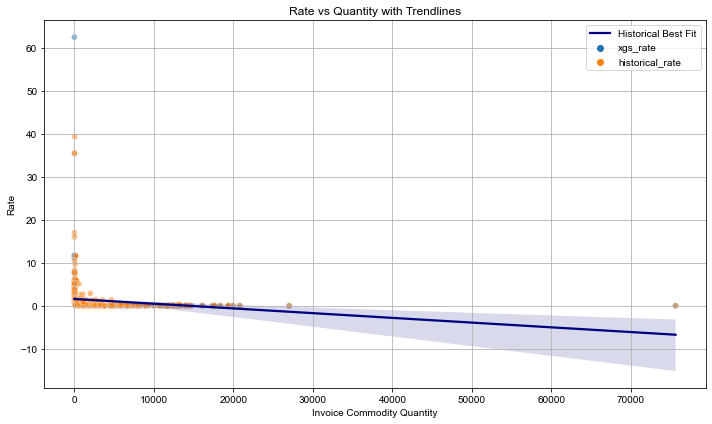

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Clean data
clean_df = df[['invoice_commodity_quantity', 'xgs_rate', 'historical_rate']].dropna()

# Melt the DataFrame to long format for easier plotting
long_df = clean_df.melt(
    id_vars='invoice_commodity_quantity', 
    value_vars=['xgs_rate', 'historical_rate'], 
    var_name='rate_type', 
    value_name='rate'
)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=long_df, 
    x='invoice_commodity_quantity', 
    y='rate', 
    hue='rate_type', 
    alpha=0.5
)
# sns.regplot(
#     data=long_df[long_df['rate_type'] == 'xgs_rate'],
#     x='invoice_commodity_quantity',
#     y='rate',
#     scatter=False,
#     color='maroon',
#     label='XGS Best Fit'
# )
sns.regplot(
    data=long_df[long_df['rate_type'] == 'historical_rate'],
    x='invoice_commodity_quantity',
    y='rate',
    scatter=False,
    color='navy',
    label='Historical Best Fit'
)

# Formatting
plt.title("Rate vs Quantity with Trendlines")
plt.xlabel("Invoice Commodity Quantity")
plt.ylabel("Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [202]:
df.head(2)

,invoice_id,site,new_commodity_group,invoice_commodity_quantity,multiple_commodities,priority_multiple_commodities,freight_per_invoice,invoice_total,invoice_commodity_group,invoice_commodity_description,...,realistic_optimal_cost,realistic_optimal_method,xgs_rate,historical_rate,rate_ratio_normal,pct_difference,savings_flag,freight_ratio_normal_site,rate_ratio_normal_outlier,pct_difference_outlier
2,357870,SPCP,1VNL,5759.70,False,False,602.67,15078.17,1VNL,VCT,...,724.40,LTL,0.125770,0.104636,1.201985,20.198450,SAVINGS,0.756983,OK,OK
17,367488,SPCP,1CPT,1893.27,False,False,1650.00,64091.69,1CPT,Carpet Tiles,...,1722.89,LTL,0.910008,0.871508,1.044176,4.417576,SAVINGS,0.756983,OK,OK


In [203]:
df.columns

Index(['invoice_id', 'site', 'new_commodity_group',
       'invoice_commodity_quantity', 'multiple_commodities',
       'priority_multiple_commodities', 'freight_per_invoice', 'invoice_total',
       'invoice_commodity_group', 'invoice_commodity_description', 'location',
       'supplier_name', 'model', 'supplier_mode', 'supplier_match_flag',
       'standardization_status', 'error_summary', 'priority_failure_reasons',
       'method', 'unit', 'rate_unit', 'freight_class', 'applied_rate',
       'shipment_type', 'invoice_freight_commodity_cost', 'base_rate',
       'inflation_rate', 'fsc_rate', 'intertim_rate', 'xgs_rebate',
       'star_net_rebate', 'raw_invoice_cost', 'minimum_applied',
       'freight_class_rank', 'ltl_only_cost', 'ftl_cost', 'ltl_fallback_cost',
       'xgs_threshold_cost', 'xgs_method', 'optimal_cost', 'optimal_method',
       'ftl_blocked', 'penalty_vs_optimal', 'hybrid_overflow_flag',
       'hybrid_num_truckloads', 'hybrid_overflow_qty', 'hybrid_overflow_cost',

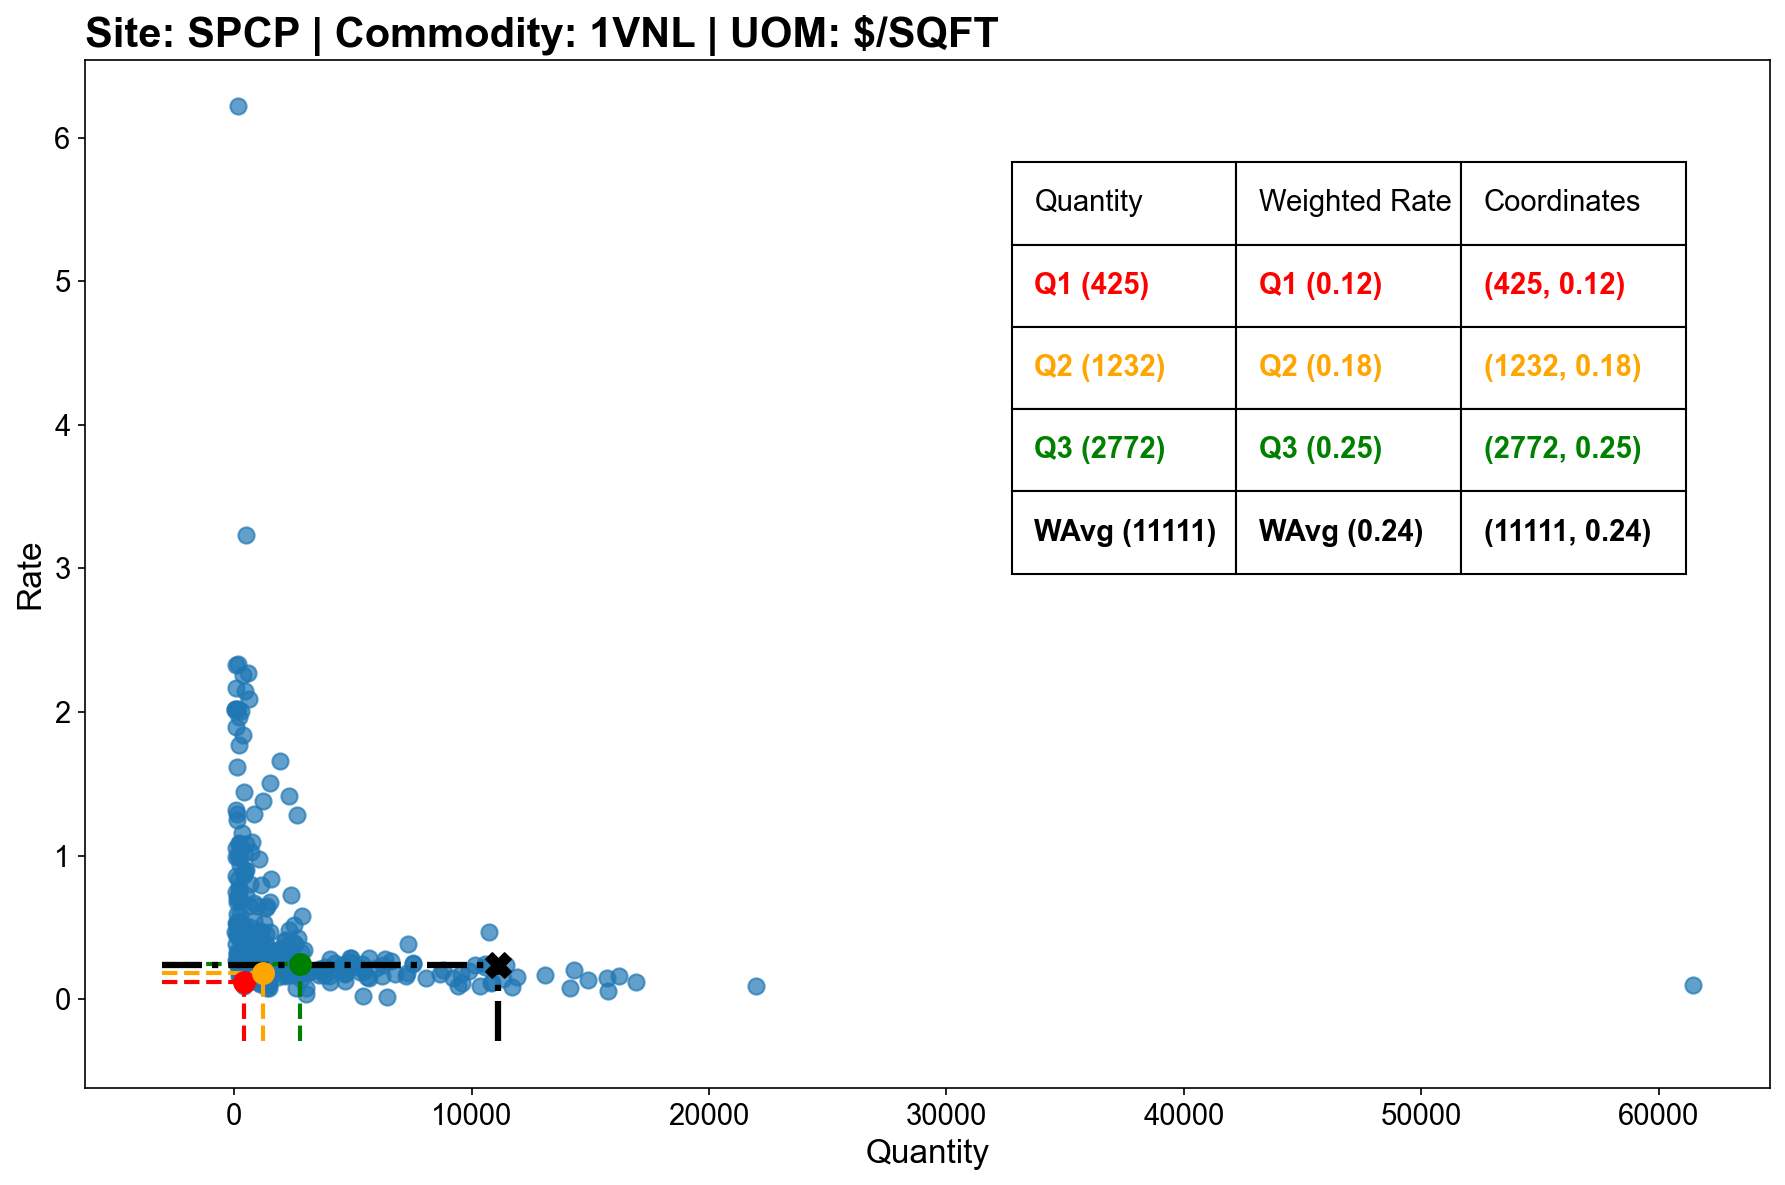

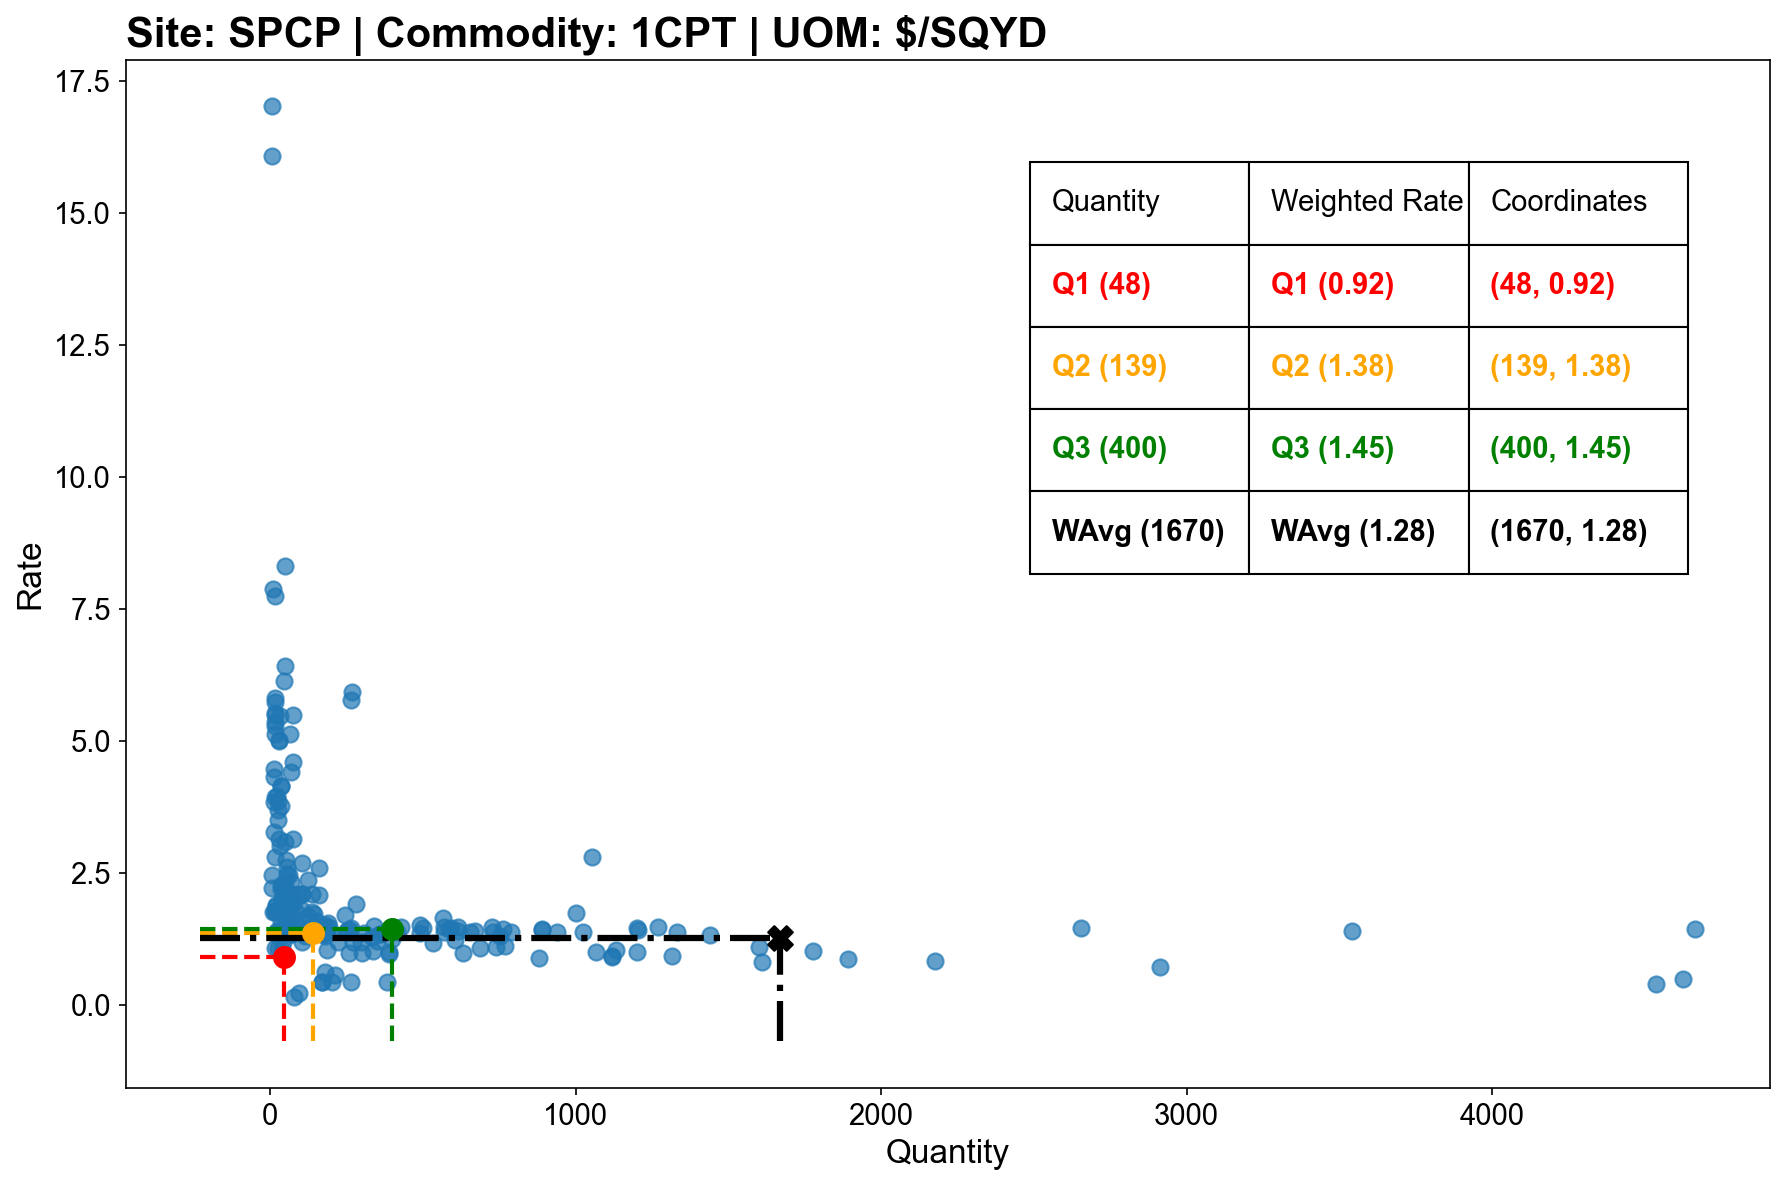

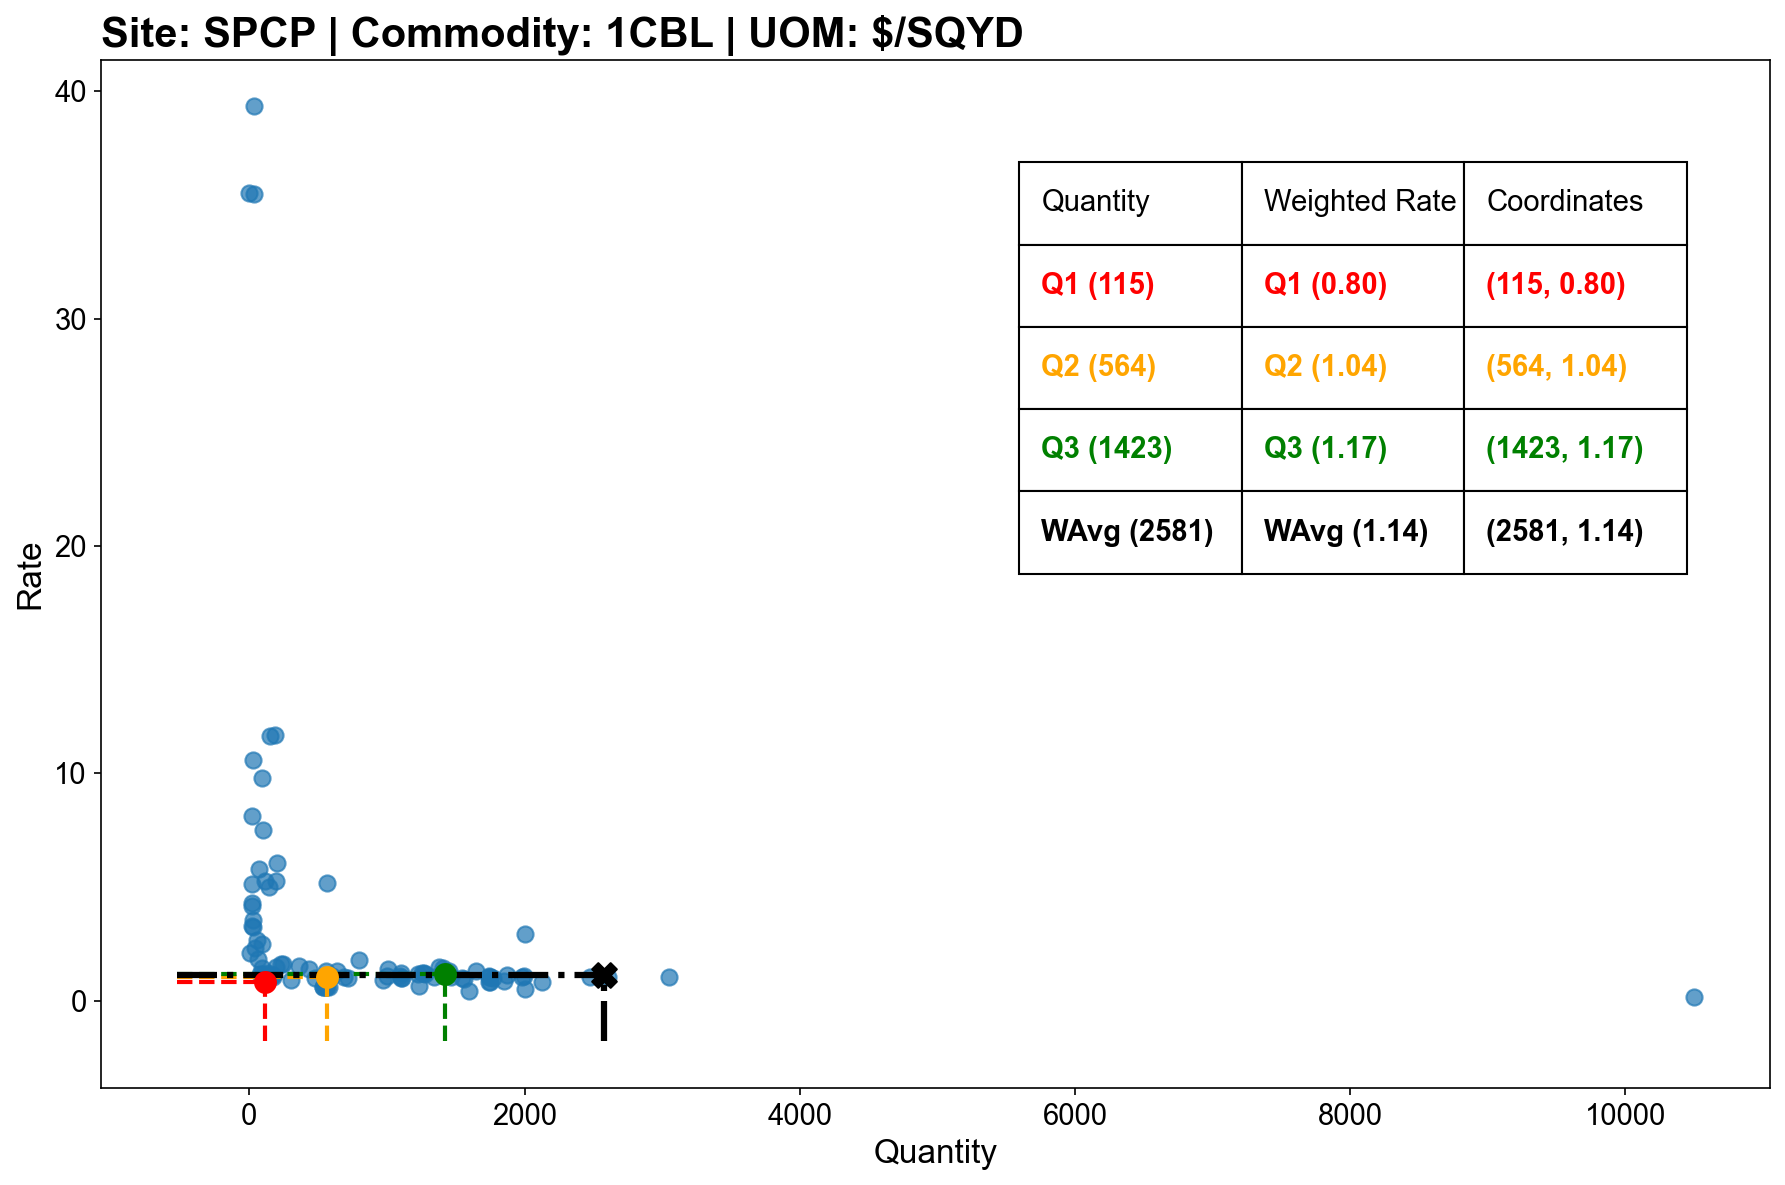

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Arial'

def weighted_quantile(values, weights, quantiles):
    sorter = np.argsort(values)
    values_sorted = values[sorter]
    weights_sorted = weights[sorter]
    weighted_cdf = np.cumsum(weights_sorted) / np.sum(weights_sorted)
    return np.interp(quantiles, weighted_cdf, values_sorted)

# Assuming df is already loaded with columns:
# 'site', 'invoice_commodity_group', 'invoice_commodity_quantity', 'historical_rate'

sites = df['site'].unique()

for site in sites:
    site_df = df[df['site'] == site]
    
    commodities = site_df['invoice_commodity_group'].unique()
    
    for commodity in commodities:
        com_df = site_df[site_df['invoice_commodity_group'] == commodity]
        if commodity == '1VNL':
            com_df = com_df.copy()
            com_df['invoice_commodity_quantity'] = com_df['invoice_commodity_quantity'] / 1.23
            com_df['historical_rate'] = com_df['historical_rate'] * 1.23
                
        # Set dynamic rate unit in title
        if commodity in ['1CPT', '1CBL']:
            rate_unit = '$/SQYD'
        elif commodity == '1VNL':
            rate_unit = '$/SQFT'
        else:
            rate_unit = ''
        
        # Quantiles for Quantity (x-axis references)
        Q1, Q2, Q3 = com_df['invoice_commodity_quantity'].quantile([0.25, 0.5, 0.75])
        
        # Weighted quantiles for Rate
        R1, R2, R3 = weighted_quantile(com_df['historical_rate'].values,
                                       com_df['invoice_commodity_quantity'].values,
                                       [0.25, 0.5, 0.75])
        
        # Weighted average Rate
        R_wavg = np.average(com_df['historical_rate'], weights=com_df['invoice_commodity_quantity'])
        
        # Weighted average Quantity
        Q_wavg = np.average(com_df['invoice_commodity_quantity'], weights=com_df['invoice_commodity_quantity'])
        
        fig, ax = plt.subplots(figsize=(12, 8), dpi=150)
        
        ax.scatter(com_df['invoice_commodity_quantity'], com_df['historical_rate'], alpha=0.7, s=60)
        
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        
        # Plot quartile lines and dots for Q1
        ax.plot([Q1, Q1], [ymin, R1], color='red', linestyle='--', linewidth=2)
        ax.plot([xmin, Q1], [R1, R1], color='red', linestyle='--', linewidth=2)
        ax.scatter(Q1, R1, color='red', s=100, zorder=5)
        
        # Q2
        ax.plot([Q2, Q2], [ymin, R2], color='orange', linestyle='--', linewidth=2)
        ax.plot([xmin, Q2], [R2, R2], color='orange', linestyle='--', linewidth=2)
        ax.scatter(Q2, R2, color='orange', s=100, zorder=5)
        
        # Q3
        ax.plot([Q3, Q3], [ymin, R3], color='green', linestyle='--', linewidth=2)
        ax.plot([xmin, Q3], [R3, R3], color='green', linestyle='--', linewidth=2)
        ax.scatter(Q3, R3, color='green', s=100, zorder=5)
        
        # Weighted average lines and dot
        ax.plot([Q_wavg, Q_wavg], [ymin, R_wavg], color='black', linestyle='-.', linewidth=3)
        ax.plot([xmin, Q_wavg], [R_wavg, R_wavg], color='black', linestyle='-.', linewidth=3)
        ax.scatter(Q_wavg, R_wavg, color='black', s=140, zorder=6, marker='X')
        
        ax.set_title(f'Site: {site} | Commodity: {commodity} | UOM: {rate_unit}',
                     fontsize=20, fontweight='bold', loc='left')
        ax.set_xlabel('Quantity', fontsize=16)
        ax.set_ylabel('Rate', fontsize=16)
        ax.tick_params(axis='both', labelsize=14)
        
        # Prepare table data for subplot
        intersection_data = [
            [f'Q1 ({Q1:.0f})', f'Q1 ({R1:.2f})', f'({Q1:.0f}, {R1:.2f})'],
            [f'Q2 ({Q2:.0f})', f'Q2 ({R2:.2f})', f'({Q2:.0f}, {R2:.2f})'],
            [f'Q3 ({Q3:.0f})', f'Q3 ({R3:.2f})', f'({Q3:.0f}, {R3:.2f})'],
            [f'WAvg ({Q_wavg:.0f})', f'WAvg ({R_wavg:.2f})', f'({Q_wavg:.0f}, {R_wavg:.2f})'],
        ]
        col_labels = ['Quantity', 'Weighted Rate', 'Coordinates']
        
        table = ax.table(cellText=intersection_data,
                         colLabels=col_labels,
                         cellLoc='center',
                         loc='upper right',
                         bbox=[0.55, 0.5, 0.4, 0.4])
        table.auto_set_font_size(False)
        table.set_fontsize(14)
        
        # Left align all cells text
        for (row, col), cell in table.get_celld().items():
            cell.get_text().set_ha('left')  # horizontal alignment left
        
        colors = ['red', 'orange', 'green', 'black']
        for row_idx, color in enumerate(colors, start=1):
            for col_idx in range(len(col_labels)):
                cell = table[(row_idx, col_idx)]
                cell.get_text().set_color(color)
                cell.get_text().set_fontweight('bold')
        
        plt.tight_layout()
        plt.show()
